In [1]:
import pandas as pd

calls_df = pd.read_csv('/content/drive/MyDrive/ua/callsf0d4f5a.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/ua/customers2afd6ea.csv')
reason_df = pd.read_csv('/content/drive/MyDrive/ua/reason18315ff.csv')
sentiment_df = pd.read_csv('/content/drive/MyDrive/ua/sentiment_statisticscc1e57a.csv')

calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

calls_df['handle_time'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['speed_to_answer'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

full_df = calls_df.merge(reason_df, on='call_id', how='left')
full_df = full_df.merge(sentiment_df, on='call_id', how='left')
full_df = full_df.merge(customers_df, on='customer_id', how='left')


In [2]:
full_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,1680.0,540.0,Post Flight,413148,calm,calm,0.05,0.34,Dennis Singleton DDS,NaN
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,480.0,180.0,Upgrade,980156,calm,frustrated,0.03,0.22,Paul Mitchell,1.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,360.0,360.0,Upgrade,616988,calm,polite,0.05,0.42,Kaylee Lang,NaN
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,240.0,360.0,NaN,161354,neutral,polite,-0.07,0.13,Christine Oneal,1.0


In [3]:
full_df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
handle_time,0
speed_to_answer,0
primary_call_reason,5157


In [4]:
import pandas as pd
from scipy import stats

for column in full_df.columns:
  if column != 'call_id':
    if pd.api.types.is_numeric_dtype(full_df[column]):
      # Perform Shapiro-Wilk test for normality
      statistic, p_value = stats.shapiro(full_df[column].dropna())
      print(f"Column: {column}")
      print(f"Shapiro-Wilk Test Statistic: {statistic}")
      print(f"P-value: {p_value}")
      if p_value > 0.05:
        print("The data in this column is likely normally distributed.")
      else:
        print("The data in this column is likely not normally distributed.")
      print("----------------------------------")



Column: customer_id
Shapiro-Wilk Test Statistic: 0.955038376533741
P-value: 5.395138085964172e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: agent_id_x
Shapiro-Wilk Test Statistic: 0.9536457058608623
P-value: 1.0182798657278384e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: handle_time
Shapiro-Wilk Test Statistic: 0.7234463604486634
P-value: 1.3743016090211914e-133
The data in this column is likely not normally distributed.
----------------------------------
Column: speed_to_answer
Shapiro-Wilk Test Statistic: 0.957857220392918
P-value: 1.8137748301019555e-83
The data in this column is likely not normally distributed.
----------------------------------
Column: agent_id_y
Shapiro-Wilk Test Statistic: 0.9536457058608623
P-value: 1.0182798657278384e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: average_sentiment

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71810.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71701.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46043.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = full_df.select_dtypes(include=['number']).columns

full_df[numerical_cols] = scaler.fit_transform(full_df[numerical_cols])

print(full_df)


        call_id  customer_id  agent_id_x call_start_datetime  \
0      0.466798     0.203313    0.965506 2024-07-31 23:56:00   
1      0.112198     0.818675    0.467282 2024-08-01 00:03:00   
2      0.683438     0.241686    0.062544 2024-07-31 23:59:00   
3      0.226638     0.115454    0.432801 2024-08-01 00:05:00   
4      0.121151     0.521448    0.694676 2024-08-01 00:04:00   
...         ...          ...         ...                 ...   
71805  0.156319     0.802272    0.348455 2024-08-31 23:48:00   
71806  0.886615     0.447489    0.984622 2024-08-31 23:55:00   
71807  0.801937     0.976211    0.577158 2024-08-31 23:52:00   
71808  0.833221     0.809567    0.065950 2024-08-31 23:53:00   
71809  0.821086     0.801444    0.499298 2024-08-31 23:49:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-01 00:07:00 2024-08-01 00:26:00   
3         2024-08-0

In [6]:
from scipy import stats

for column in full_df.select_dtypes(include=['number']).columns:
  # Perform Shapiro-Wilk test for normality
  statistic, p_value = stats.shapiro(full_df[column].dropna())
  print(f"Column: {column}")
  print(f"Shapiro-Wilk Test Statistic: {statistic}")
  print(f"P-value: {p_value}")
  if p_value > 0.05:
    print("The data in this column is likely normally distributed.")
  else:
    print("The data in this column is likely not normally distributed.")
  print("----------------------------------")


Column: call_id
Shapiro-Wilk Test Statistic: 0.9544099941000046
P-value: 2.528827335340618e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: customer_id
Shapiro-Wilk Test Statistic: 0.955038376533741
P-value: 5.395138085964172e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: agent_id_x
Shapiro-Wilk Test Statistic: 0.9536457058608631
P-value: 1.018279865728738e-85
The data in this column is likely not normally distributed.
----------------------------------
Column: handle_time
Shapiro-Wilk Test Statistic: 0.7234463604486636
P-value: 1.3743016090211914e-133
The data in this column is likely not normally distributed.
----------------------------------
Column: speed_to_answer
Shapiro-Wilk Test Statistic: 0.9578572203929178
P-value: 1.81377483010118e-83
The data in this column is likely not normally distributed.
----------------------------------
Column: agent_id_y
Shapiro-Wilk

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71810.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71701.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46043.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

columns_to_impute = ['average_sentiment', 'elite_level_code']

full_df[columns_to_impute] = imputer.fit_transform(full_df[columns_to_impute])


In [19]:
# Calculate the median for elite_level_code, agent_tone, and average_sentiment
median_elite_level_code = full_df['elite_level_code'].mean()
# median_agent_tone = full_df['agent_tone'].median()
median_average_sentiment = full_df['average_sentiment'].mean()

# Fill NaN values with the calculated medians
full_df['elite_level_code'].fillna(median_elite_level_code, inplace=True)
# full_df['agent_tone'].fillna(median_agent_tone, inplace=True)
full_df['average_sentiment'].fillna(median_average_sentiment, inplace=True)


<ipython-input-19-cac3cbe2ace5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['elite_level_code'].fillna(median_elite_level_code, inplace=True)
<ipython-input-19-cac3cbe2ace5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [20]:
full_df.to_csv('full_df.csv', index=False)

In [ ]:
average_handle_time = full_df['handle_time'].mean()
average_handle_time

697.0486004734717

In [ ]:
average_speed_to_answer = full_df['speed_to_answer'].mean()
average_speed_to_answer

437.0675393399248

In [ ]:
# Group by elite_level_code and calculate the average handle time
average_handle_time_by_elite_level = full_df.groupby('elite_level_code')['handle_time'].mean()

# Display the results in a table
print(average_handle_time_by_elite_level)


elite_level_code
0.0    695.999166
1.0    688.371608
2.0    726.449925
3.0    727.510460
4.0    788.244706
5.0    896.950608
Name: handle_time, dtype: float64


In [ ]:
# Group by elite_level_code and calculate the average speed_to_answer
average_sta_by_elite_level = full_df.groupby('elite_level_code')['speed_to_answer'].mean()

print(average_sta_by_elite_level)



elite_level_code
0.0    438.579273
1.0    436.918580
2.0    432.772795
3.0    429.341004
4.0    413.308235
5.0    411.410165
Name: speed_to_answer, dtype: float64


In [ ]:
average_sentiment_by_agent_tone = full_df.groupby('agent_tone')['average_sentiment'].mean()
print(average_sentiment_by_agent_tone)


agent_tone
angry        -0.616478
calm          0.101289
frustrated   -0.329978
neutral      -0.080355
polite        0.673793
Name: average_sentiment, dtype: float64


In [ ]:
average_sentiment_by_customer_tone = full_df.groupby('customer_tone')['average_sentiment'].mean()
print(average_sentiment_by_customer_tone)


customer_tone
angry        -0.032427
calm         -0.032501
frustrated   -0.034490
neutral      -0.033709
polite       -0.034475
Name: average_sentiment, dtype: float64


In [ ]:
average_sentiment_by_agent_customer_tone = full_df.groupby(['agent_tone', 'customer_tone'])['average_sentiment'].mean()
print(average_sentiment_by_agent_customer_tone)


agent_tone  customer_tone
angry       angry           -0.594675
            calm            -0.642500
            frustrated      -0.620465
            neutral         -0.588375
            polite          -0.639744
calm        angry            0.103685
            calm             0.100173
            frustrated       0.101585
            neutral          0.099653
            polite           0.101379
frustrated  angry           -0.327773
            calm            -0.327417
            frustrated      -0.330105
            neutral         -0.331307
            polite          -0.332996
neutral     angry           -0.080034
            calm            -0.080865
            frustrated      -0.080468
            neutral         -0.079891
            polite          -0.080524
polite      angry            0.675556
            calm             0.738235
            frustrated       0.674375
            neutral          0.617059
            polite           0.664737
Name: average_sentiment,

In [ ]:
average_sentiment_by_call_reason = full_df.groupby('primary_call_reason')['average_sentiment'].mean()
print(average_sentiment_by_call_reason)


primary_call_reason
Baggage                 -0.019681
Booking                 -0.013369
Check-In                -0.042993
Checkout                -0.069030
Communications          -0.036392
Digital Support         -0.042131
Disability               0.035757
ETC                     -0.049327
IRROPS                  -0.074065
Mileage Plus            -0.027398
Other Topics            -0.003848
Post-Flight             -0.063914
Products and Services   -0.034430
Schedule Change         -0.033844
Seating                 -0.002770
Traveler Updates         0.006727
Unaccompanied Minor     -0.013846
Upgrade                 -0.016007
Voluntary Cancel        -0.031512
Voluntary Change        -0.003826
Name: average_sentiment, dtype: float64


In [ ]:
#  full_df.info()

In [ ]:
new_full_df = full_df[full_df['handle_time'] > average_handle_time][['call_id', 'customer_id', 'agent_id_x', 'handle_time', 'speed_to_answer', 'primary_call_reason', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average', 'elite_level_code']]
new_full_df

,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code
0,4667960400,2033123310,963118,1860.0,420.0,Voluntary Cancel,neutral,angry,-0.04,0.39,4.0
1,1122072124,8186702651,519057,720.0,180.0,Booking,calm,neutral,0.02,0.35,NaN
2,6834291559,2416856629,158319,1140.0,480.0,IRROPS,neutral,polite,-0.13,0.32,NaN
5,5297766997,5590154991,817160,1440.0,300.0,Mileage Plus,calm,calm,0.10,0.11,5.0
6,324593040,6774865122,519057,780.0,780.0,Checkout,neutral,frustrated,0.00,0.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71797,6085386911,3115467713,384932,1200.0,420.0,IRROPS,neutral,calm,-0.08,0.32,0.0
71798,5697470605,3442807454,974978,1260.0,300.0,IRROPS,neutral,frustrated,-0.07,0.78,3.0
71800,8432220782,4800195868,336455,1200.0,540.0,Seating,neutral,angry,-0.03,0.23,NaN
71802,8351489985,5821883708,859203,900.0,420.0,Upgrade,neutral,polite,-0.07,0.04,1.0


In [ ]:
full_df['silence_percent_average'].max()

0.98

In [ ]:
max_silence_percent = full_df['silence_percent_average'].max()
handle_time_at_max_silence = full_df[full_df['silence_percent_average'] == max_silence_percent]['handle_time'].values[0]

print(f"Handle time when silence percentage is maximum: {handle_time_at_max_silence}")


Handle time when silence percentage is maximum: 1680.0


In [ ]:
# Calculate silence_time
full_df['silence_time'] = full_df['handle_time'] * (full_df['silence_percent_average'])

print(full_df)


          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118 2024-07-31 23:56:00   
1      1122072124   8186702651      519057 2024-08-01 00:03:00   
2      6834291559   2416856629      158319 2024-07-31 23:59:00   
3      2266439882   1154544516      488324 2024-08-01 00:05:00   
4      1211603231   5214456437      721730 2024-08-01 00:04:00   
...           ...          ...         ...                 ...   
71805  1563273072   8022667294      413148 2024-08-31 23:48:00   
71806  8865997781   4474867021      980156 2024-08-31 23:55:00   
71807  8019240181   9762042472      616988 2024-08-31 23:52:00   
71808  8332067080   8095620266      161354 2024-08-31 23:53:00   
71809  8210720833   8014388758      547592 2024-08-31 23:49:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-01 00:07:00 2024-08-01 00:26:0

In [ ]:
full_df['real_handle_time'] = full_df['handle_time'] - full_df['silence_time']

print(full_df)


          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118 2024-07-31 23:56:00   
1      1122072124   8186702651      519057 2024-08-01 00:03:00   
2      6834291559   2416856629      158319 2024-07-31 23:59:00   
3      2266439882   1154544516      488324 2024-08-01 00:05:00   
4      1211603231   5214456437      721730 2024-08-01 00:04:00   
...           ...          ...         ...                 ...   
71805  1563273072   8022667294      413148 2024-08-31 23:48:00   
71806  8865997781   4474867021      980156 2024-08-31 23:55:00   
71807  8019240181   9762042472      616988 2024-08-31 23:52:00   
71808  8332067080   8095620266      161354 2024-08-31 23:53:00   
71809  8210720833   8014388758      547592 2024-08-31 23:49:00   

      agent_assigned_datetime   call_end_datetime  \
0         2024-08-01 00:03:00 2024-08-01 00:34:00   
1         2024-08-01 00:06:00 2024-08-01 00:18:00   
2         2024-08-01 00:07:00 2024-08-01 00:26:0

In [ ]:
import pandas as pd
from scipy import stats

correlation_sentiment_handle_time = stats.pearsonr(full_df['average_sentiment'].fillna(0), full_df['handle_time'])
print(f"Correlation between average_sentiment and handle_time: {correlation_sentiment_handle_time}")

# Convert agent_tone to numerical values
agent_tone_mapping = {'angry': -2, 'calm': 1, 'neutral': 0, 'frustrated': -1 , 'polite': 2}
full_df['agent_tone_numeric'] = full_df['agent_tone'].map(agent_tone_mapping)

correlation_agent_tone_handle_time = stats.pearsonr(full_df['agent_tone_numeric'].fillna(0), full_df['handle_time'])
print(f"Correlation between agent_tone and handle_time: {correlation_agent_tone_handle_time}")

groups = full_df.groupby('primary_call_reason')['handle_time'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)

print(f"ANOVA test for primary_call_reason and handle_time: F-statistic = {f_statistic}, p-value = {p_value}")



Correlation between average_sentiment and handle_time: PearsonRResult(statistic=-0.07611729572269205, pvalue=9.677052221754841e-93)
Correlation between agent_tone and handle_time: PearsonRResult(statistic=-0.03985368282068269, pvalue=1.2120065898729407e-26)
ANOVA test for primary_call_reason and handle_time: F-statistic = 218.1918227564088, p-value = 0.0


In [ ]:
import pandas as pd
from scipy import stats
# Convert customer_tone to numerical values
customer_tone_mapping = {'angry': -2, 'calm': 1, 'neutral': 0, 'frustrated': -1, 'polite': 2}
full_df['customer_tone_numeric'] = full_df['customer_tone'].map(customer_tone_mapping)

correlation_customer_tone_handle_time = stats.pearsonr(full_df['customer_tone_numeric'].fillna(0), full_df['handle_time'])
print(f"Correlation between customer_tone and handle_time: {correlation_customer_tone_handle_time}")


Correlation between customer_tone and handle_time: PearsonRResult(statistic=-0.0008973569606816631, pvalue=0.80997049988338)


In [ ]:
groups = full_df.groupby('primary_call_reason')['handle_time'].apply(list)
f_statistic, p_value = stats.f_oneway(*groups)

print(f"ANOVA test for primary_call_reason and handle_time: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA test for primary_call_reason and handle_time: F-statistic = 218.1918227564088, p-value = 0.0


In [ ]:
new_encoded_full_df = new_full_df

In [ ]:
new_encoded_full_df['agent_tone'].unique()

array(['neutral', 'calm', 'frustrated', 'angry', nan, 'polite'],
      dtype=object)

In [ ]:
new_encoded_full_df['customer_tone'].unique()

array(['angry', 'neutral', 'polite', 'calm', 'frustrated'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'customer_tone' column
new_encoded_full_df['agent_tone_encoded'] = ordinal_encoder.fit_transform(new_encoded_full_df[['agent_tone']])


In [ ]:
# Correlation between average_sentiment, agent_tone, and primary_call_reason all together
correlation_matrix = full_df[['average_sentiment', 'agent_tone_numeric', 'handle_time']].corr()
print("Correlation Matrix (average_sentiment, agent_tone, handle_time):")
print(correlation_matrix)

# Correlation between average_sentiment and agent_tone
correlation_sentiment_agent_tone = stats.pearsonr(full_df['average_sentiment'].fillna(0), full_df['agent_tone_numeric'].fillna(0))
print(f"Correlation between average_sentiment and agent_tone: {correlation_sentiment_agent_tone}")

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
full_df['primary_call_reason_encoded'] = label_encoder.fit_transform(full_df['primary_call_reason'])

correlation_agent_tone_reason = stats.pearsonr(full_df['agent_tone_numeric'].fillna(0), full_df['primary_call_reason_encoded'].fillna(0))
print(f"Correlation between agent_tone and primary_call_reason: {correlation_agent_tone_reason}")


Correlation Matrix (average_sentiment, agent_tone, handle_time):
                    average_sentiment  agent_tone_numeric  handle_time
average_sentiment            1.000000                 NaN    -0.076065
agent_tone_numeric                NaN                 NaN          NaN
handle_time                 -0.076065                 NaN     1.000000
Correlation between average_sentiment and agent_tone: PearsonRResult(statistic=nan, pvalue=nan)
Correlation between agent_tone and primary_call_reason: PearsonRResult(statistic=nan, pvalue=nan)


<ipython-input-12-2fd6176312de>:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_sentiment_agent_tone = stats.pearsonr(full_df['average_sentiment'].fillna(0), full_df['agent_tone_numeric'].fillna(0))
<ipython-input-12-2fd6176312de>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_agent_tone_reason = stats.pearsonr(full_df['agent_tone_numeric'].fillna(0), full_df['primary_call_reason_encoded'].fillna(0))


In [ ]:
correlation_agent_tone_encoded_handle_time = stats.pearsonr(new_encoded_full_df['agent_tone_encoded'].fillna(0), new_encoded_full_df['handle_time'])
print(f"Correlation between agent_tone_encoded and handle_time: {correlation_agent_tone_encoded_handle_time}")


Correlation between agent_tone_encoded and handle_time: PearsonRResult(statistic=0.10305347089567503, pvalue=4.567400540714452e-57)


In [ ]:
avg_handle_time_by_reason = new_encoded_full_df.groupby('primary_call_reason')['handle_time'].mean()
print(avg_handle_time_by_reason)

primary_call_reason
 Baggage                    865.000000
Baggage                    1183.545151
Baggage                    1195.384615
Booking                    1347.788018
Booking                    1170.000000
Check In                   1694.430380
Check-In                   1772.292359
Check-In                   2450.000000
Checkout                   1569.838057
Checkout                   1914.000000
Communications             1517.165150
Communications             1597.500000
Digital   Support          1196.666667
Digital  Support           1300.000000
Digital Support            1237.333333
Digital Support            1080.000000
Disability                 1234.285714
Disability                  900.000000
ETC                        1638.097448
ETC                        2327.142857
IRROPS                     1492.774498
IRROPS                     1506.947368
Mileage   Plus             1520.909091
Mileage  Plus              1713.636364
Mileage Plus               1652.428256
Milea

In [ ]:
# Correlation between average_sentiment, agent_tone, and primary_call_reason all together
correlation_matrix = full_df[['average_sentiment', 'agent_tone_numeric', 'primary_call_reason_encoded']].corr()
print("Correlation Matrix (average_sentiment, agent_tone, primary_call_reason):")
print(correlation_matrix)

# Correlation between average_sentiment and primary_call_reason
correlation_sentiment_reason = stats.pearsonr(full_df['average_sentiment'].fillna(0), full_df['primary_call_reason_encoded'].fillna(0))
print(f"Correlation between average_sentiment and primary_call_reason: {correlation_sentiment_reason}")



Correlation Matrix (average_sentiment, agent_tone, primary_call_reason):
                             average_sentiment  agent_tone_numeric  \
average_sentiment                     1.000000                 NaN   
agent_tone_numeric                         NaN                 NaN   
primary_call_reason_encoded           0.084001                 NaN   

                             primary_call_reason_encoded  
average_sentiment                               0.084001  
agent_tone_numeric                                   NaN  
primary_call_reason_encoded                     1.000000  
Correlation between average_sentiment and primary_call_reason: PearsonRResult(statistic=0.08386404175438754, pvalue=3.1207237694445885e-112)


In [ ]:
full_df['primary_call_reason'] = full_df['primary_call_reason'].str.strip().str.replace(' +', ' ', regex=True)


In [ ]:
full_df['primary_call_reason'] = full_df['primary_call_reason'].str.replace('Check In', 'Check-In')
full_df['primary_call_reason'] = full_df['primary_call_reason'].str.replace('Products & Services', 'Products and Services')
full_df['primary_call_reason'] = full_df['primary_call_reason'].str.replace('Post Flight', 'Post-Flight')



In [ ]:
avg_handle_time_by_reason = full_df.groupby('primary_call_reason')['handle_time'].mean()
print(avg_handle_time_by_reason)


primary_call_reason
Baggage                   333.644068
Booking                   427.736064
Check-In                  574.128151
Checkout                 1016.853814
Communications            826.718750
Digital Support           372.293878
Disability                292.109181
ETC                       962.899160
IRROPS                    785.116069
Mileage Plus              995.573406
Other Topics              350.097800
Post-Flight               932.896074
Products and Services     746.560624
Schedule Change           490.013680
Seating                   474.994501
Traveler Updates          393.233725
Unaccompanied Minor       519.230769
Upgrade                   632.344777
Voluntary Cancel          721.866833
Voluntary Change          639.153761
Name: handle_time, dtype: float64


In [ ]:
avg_handle_time_by_reason = full_df.groupby('primary_call_reason')['real_handle_time'].mean()
print(avg_handle_time_by_reason)


primary_call_reason
Baggage                  208.195127
Booking                  270.746985
Check-In                 364.898950
Checkout                 629.674894
Communications           526.699531
Digital Support          226.264653
Disability               204.175682
ETC                      603.251471
IRROPS                   469.490331
Mileage Plus             654.916766
Other Topics             212.757946
Post-Flight              585.459353
Products and Services    474.260204
Schedule Change          300.531874
Seating                  309.874313
Traveler Updates         239.524226
Unaccompanied Minor      335.336538
Upgrade                  408.943828
Voluntary Cancel         446.287617
Voluntary Change         401.606084
Name: real_handle_time, dtype: float64


In [ ]:
avg_handle_time_by_reason = full_df.groupby('primary_call_reason')['silence_time'].mean()
print(avg_handle_time_by_reason)


primary_call_reason
Baggage                  125.448941
Booking                  156.989078
Check-In                 209.229202
Checkout                 387.178919
Communications           300.019219
Digital Support          146.029224
Disability                87.933499
ETC                      359.647689
IRROPS                   315.625738
Mileage Plus             340.656640
Other Topics             137.339853
Post-Flight              347.436721
Products and Services    272.300420
Schedule Change          189.481806
Seating                  165.120189
Traveler Updates         153.709498
Unaccompanied Minor      183.894231
Upgrade                  223.400950
Voluntary Cancel         275.579216
Voluntary Change         237.547677
Name: silence_time, dtype: float64


In [ ]:
# Calculate the frequency of each primary_call_reason
reason_counts = full_df['primary_call_reason'].value_counts()

# Get the most frequent and least frequent reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# Calculate the average handle time for the most and least frequent reasons
avg_handle_time_most_frequent = full_df[full_df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
avg_handle_time_least_frequent = full_df[full_df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

# Calculate the percentage difference
percentage_difference = ((avg_handle_time_most_frequent - avg_handle_time_least_frequent) / avg_handle_time_least_frequent) * 100

print(f"Percentage difference in handling time between most frequent and least frequent primary call reasons: {percentage_difference:.2f}%")


Percentage difference in handling time between most frequent and least frequent primary call reasons: 51.21%


In [ ]:
import plotly.express as px

avg_handle_time_by_reason = full_df.groupby('primary_call_reason')['handle_time'].mean()

# Create a bar chart using Plotly
fig = px.bar(
    x=avg_handle_time_by_reason.index,
    y=avg_handle_time_by_reason.values,
    labels={'x': 'Primary Call Reason', 'y': 'Average Handling Time'},
    title='Average Handle Time by Primary Call Reason'
)

fig.show()


In [ ]:
import plotly.express as px

# Calculate the frequency of each primary_call_reason
reason_counts = full_df['primary_call_reason'].value_counts()

# Get the most frequent and least frequent reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

filtered_df = full_df[full_df['primary_call_reason'].isin([most_frequent_reason, least_frequent_reason])]

# Calculate the average handle time for the most and least frequent reasons
avg_handle_time_by_reason = filtered_df.groupby('primary_call_reason')['handle_time'].mean()

avg_handle_time_df = avg_handle_time_by_reason.reset_index()
avg_handle_time_df.columns = ['primary_call_reason', 'handle_time']

# Create a pie chart using Plotly
fig = px.pie(
    data_frame=avg_handle_time_df,
    values='handle_time',
    names='primary_call_reason',
    title='Average Handle Time for Most and Least Frequent Call Reasons',
    hover_data=['primary_call_reason', 'handle_time']
)

fig.update_traces(
    textinfo='percent+label',
    hovertemplate='<b>Reason: %{label}</b><br>Frequency: %{value}<br>Percentage: %{percent}'
)

fig.show()

In [ ]:
# Calculate the frequency of each primary_call_reason
reason_counts = full_df['primary_call_reason'].value_counts()

# Total number of unique call reasons
total_reasons = len(reason_counts)

# Most frequent reason and its frequency
most_frequent_reason = reason_counts.idxmax()
most_frequent_reason_frequency = reason_counts.max()

# Least frequent reason and its frequency
least_frequent_reason = reason_counts.idxmin()
least_frequent_reason_frequency = reason_counts.min()

print(f"Total primary call reasons: {total_reasons}")
print(f"Most frequent reason: {most_frequent_reason}, Frequency: {most_frequent_reason_frequency}")
print(f"Least frequent reason: {least_frequent_reason}, Frequency: {least_frequent_reason_frequency}")


Total primary call reasons: 20
Most frequent reason: IRROPS, Frequency: 13311
Least frequent reason: Unaccompanied Minor, Frequency: 104


In [ ]:
most_frequent_reason

'IRROPS'

In [ ]:
least_frequent_reason

'Unaccompanied Minor'

In [ ]:
# Calculate the frequency of each primary_call_reason
reason_counts = full_df['primary_call_reason'].value_counts()

# Get the most frequent and least frequent reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# Calculate the average handle time for the most and least frequent reasons
avg_handle_time_most_frequent = full_df[full_df['primary_call_reason'] == most_frequent_reason]['real_handle_time'].mean()
avg_handle_time_least_frequent = full_df[full_df['primary_call_reason'] == least_frequent_reason]['real_handle_time'].mean()

# Calculate the percentage difference
percentage_difference = ((avg_handle_time_most_frequent - avg_handle_time_least_frequent) / avg_handle_time_least_frequent) * 100

print(f"Percentage difference in real handling time between most frequent and least frequent primary call reasons: {percentage_difference:.2f}%")


Percentage difference in real handling time between most frequent and least frequent primary call reasons: 40.01%


In [ ]:
most_frequent_reason

'IRROPS'

In [ ]:
least_frequent_reason

'Unaccompanied Minor'

In [ ]:
avg_handling_time_by_agent_tone = full_df.groupby('agent_tone')['handle_time'].mean()
print(avg_handling_time_by_agent_tone)


agent_tone
angry         394.395887
calm          626.499696
frustrated    617.068404
neutral       750.276439
polite        220.000000
Name: handle_time, dtype: float64


In [ ]:
real_avg_handling_time_by_agent_tone = full_df.groupby('agent_tone')['real_handle_time'].mean()
print(real_avg_handling_time_by_agent_tone)


agent_tone
angry         271.463753
calm          392.147331
frustrated    399.463844
neutral       470.350802
polite        127.827586
Name: real_handle_time, dtype: float64


In [ ]:
# Average handling time for each agent_tone
avg_handling_time_by_agent_tone = full_df.groupby('agent_tone')['handle_time'].mean()
print("Average handling time by agent tone:")
print(avg_handling_time_by_agent_tone)

# Average handling time for each customer_tone
avg_handling_time_by_customer_tone = full_df.groupby('customer_tone')['handle_time'].mean()
print("\nAverage handling time by customer tone:")
print(avg_handling_time_by_customer_tone)

# Average handling time for each combination of agent_tone and customer_tone
avg_handling_time_by_agent_customer_tone = full_df.groupby(['agent_tone', 'customer_tone'])['handle_time'].mean()
print("\nAverage handling time by agent and customer tone combination:")
print(avg_handling_time_by_agent_customer_tone)


Average handling time by agent tone:
agent_tone
angry         394.395887
calm          626.499696
frustrated    617.068404
neutral       750.276439
polite        220.000000
Name: handle_time, dtype: float64

Average handling time by customer tone:
customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64

Average handling time by agent and customer tone combination:
agent_tone  customer_tone
angry       angry            497.922078
            calm             352.941176
            frustrated       390.000000
            neutral          347.250000
            polite           381.538462
calm        angry            616.432345
            calm             634.914366
            frustrated       629.496933
            neutral          627.862733
            polite           623.721782
frustrated  angry            630.655738
            calm             608.011611
          

In [ ]:
# Average handling time for each combination of agent_tone and customer_tone
avg_handling_time_by_agent_customer_tone = full_df.groupby(['agent_tone', 'customer_tone'])['handle_time'].mean()
print("\nAverage handling time by agent and customer tone combination:")
print(avg_handling_time_by_agent_customer_tone)



Average handling time by agent and customer tone combination:
agent_tone  customer_tone
angry       angry            497.922078
            calm             352.941176
            frustrated       390.000000
            neutral          347.250000
            polite           381.538462
calm        angry            616.432345
            calm             634.914366
            frustrated       629.496933
            neutral          627.862733
            polite           623.721782
frustrated  angry            630.655738
            calm             608.011611
            frustrated       578.447368
            neutral          654.177898
            polite           614.586071
neutral     angry            750.640520
            calm             750.003503
            frustrated       745.372322
            neutral          764.645312
            polite           740.592298
polite      angry            340.000000
            calm             137.647059
            frustrated       20

In [ ]:
combined_tone_df = full_df.copy()
combined_tone_df['agent_customer_tone'] = combined_tone_df['agent_tone'] + '_' + combined_tone_df['customer_tone']

# Label encode the combined tone feature
label_encoder = LabelEncoder()
combined_tone_df['agent_customer_tone_encoded'] = label_encoder.fit_transform(combined_tone_df['agent_customer_tone'])

# Calculate the correlation between the encoded combined tone and handle time
correlation_combined_tone_handle_time = stats.pearsonr(combined_tone_df['agent_customer_tone_encoded'], combined_tone_df['handle_time'])

print(f"Correlation between combined agent and customer tone and handle time: {correlation_combined_tone_handle_time}")


Correlation between combined agent and customer tone and handle time: PearsonRResult(statistic=0.07096043356974627, pvalue=8.072940333458622e-81)


In [ ]:
# Average real handling time for each agent_tone
real_avg_handling_time_by_agent_tone = full_df.groupby('agent_tone')['real_handle_time'].mean()
print("Average real handling time by agent tone:")
print(real_avg_handling_time_by_agent_tone)

# Average real handling time for each customer_tone
real_avg_handling_time_by_customer_tone = full_df.groupby('customer_tone')['real_handle_time'].mean()
print("\nAverage real handling time by customer tone:")
print(real_avg_handling_time_by_customer_tone)

# Average real handling time for each combination of agent_tone and customer_tone
real_avg_handling_time_by_agent_customer_tone = full_df.groupby(['agent_tone', 'customer_tone'])['real_handle_time'].mean()
print("\nAverage real handling time by agent and customer tone combination:")
print(real_avg_handling_time_by_agent_customer_tone)


Average real handling time by agent tone:
agent_tone
angry         271.463753
calm          392.147331
frustrated    399.463844
neutral       470.350802
polite        127.827586
Name: real_handle_time, dtype: float64

Average real handling time by customer tone:
customer_tone
angry         437.991421
calm          438.802286
frustrated    435.389831
neutral       442.587026
polite        432.846496
Name: real_handle_time, dtype: float64

Average real handling time by agent and customer tone combination:
agent_tone  customer_tone
angry       angry            314.127273
            calm             238.164706
            frustrated       253.806977
            neutral          259.177500
            polite           290.446154
calm        angry            384.721658
            calm             397.882329
            frustrated       395.013865
            neutral          392.170981
            polite           390.917145
frustrated  angry            408.704098
            calm         

In [ ]:
full_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,handle_time,speed_to_answer,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,agent_tone_numeric,primary_call_reason_encoded
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0,0.0,48
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,NaN,NaN,3
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,NaN,0.0,20
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,David Wilkins,2.0,0.0,45
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,721730,neutral,polite,-0.05,0.35,Elizabeth Daniels,0.0,0.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,1680.0,540.0,Post Flight,413148,calm,calm,0.05,0.34,Dennis Singleton DDS,NaN,NaN,29
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,480.0,180.0,Upgrade,980156,calm,frustrated,0.03,0.22,Paul Mitchell,1.0,NaN,45
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,360.0,360.0,Upgrade,616988,calm,polite,0.05,0.42,Kaylee Lang,NaN,NaN,45
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,240.0,360.0,NaN,161354,neutral,polite,-0.07,0.13,Christine Oneal,1.0,0.0,54


In [ ]:
new_short_df = full_df[full_df['handle_time'] < average_handle_time][['call_id', 'customer_id', 'agent_id_x', 'handle_time', 'speed_to_answer','real_handle_time', 'primary_call_reason', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average', 'elite_level_code']]


In [ ]:
new_short_df

,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,real_handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code
3,2266439882,1154544516,488324,420.0,300.0,336.0,Upgrade,neutral,frustrated,-0.20,0.20,2.0
4,1211603231,5214456437,721730,540.0,600.0,351.0,Seating,neutral,polite,-0.05,0.35,0.0
7,8902603117,7974326984,488324,480.0,480.0,312.0,Mileage Plus,calm,angry,0.11,0.35,2.0
9,4113684017,1528835057,158319,540.0,480.0,383.4,IRROPS,neutral,angry,-0.19,0.29,NaN
10,4431106905,3351112750,721730,180.0,240.0,138.6,IRROPS,neutral,frustrated,-0.01,0.23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71804,7569738090,7367304988,783441,600.0,360.0,294.0,Mileage Plus,neutral,frustrated,-0.19,0.51,2.0
71806,8865997781,4474867021,980156,480.0,180.0,374.4,Upgrade,calm,frustrated,0.03,0.22,1.0
71807,8019240181,9762042472,616988,360.0,360.0,208.8,Upgrade,calm,polite,0.05,0.42,NaN
71808,8332067080,8095620266,161354,240.0,360.0,208.8,NaN,neutral,polite,-0.07,0.13,1.0


In [ ]:
new_short_df['primary_call_reason'] = new_short_df['primary_call_reason'].str.strip().str.replace(' +', ' ', regex=True)
new_short_df

,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,real_handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code
3,2266439882,1154544516,488324,420.0,300.0,336.0,Upgrade,neutral,frustrated,-0.20,0.20,2.0
4,1211603231,5214456437,721730,540.0,600.0,351.0,Seating,neutral,polite,-0.05,0.35,0.0
7,8902603117,7974326984,488324,480.0,480.0,312.0,Mileage Plus,calm,angry,0.11,0.35,2.0
9,4113684017,1528835057,158319,540.0,480.0,383.4,IRROPS,neutral,angry,-0.19,0.29,NaN
10,4431106905,3351112750,721730,180.0,240.0,138.6,IRROPS,neutral,frustrated,-0.01,0.23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71804,7569738090,7367304988,783441,600.0,360.0,294.0,Mileage Plus,neutral,frustrated,-0.19,0.51,2.0
71806,8865997781,4474867021,980156,480.0,180.0,374.4,Upgrade,calm,frustrated,0.03,0.22,1.0
71807,8019240181,9762042472,616988,360.0,360.0,208.8,Upgrade,calm,polite,0.05,0.42,NaN
71808,8332067080,8095620266,161354,240.0,360.0,208.8,NaN,neutral,polite,-0.07,0.13,1.0


In [ ]:
new_short_df['primary_call_reason'] = new_short_df['primary_call_reason'].str.replace('Check In', 'Check-In')
new_short_df['primary_call_reason'] = new_short_df['primary_call_reason'].str.replace('Products & Services', 'Products and Services')
new_short_df['primary_call_reason'] = new_short_df['primary_call_reason'].str.replace('Post Flight', 'Post-Flight')



In [ ]:
avg_handle_time_by_reason_short = new_short_df.groupby('primary_call_reason')['handle_time'].mean()
print(avg_handle_time_by_reason_short)


primary_call_reason
Baggage                  225.311005
Booking                  240.575605
Check-In                 270.830040
Checkout                 357.931034
Communications           352.440737
Digital Support          242.816901
Disability               236.842105
ETC                      351.242604
IRROPS                   334.551266
Mileage Plus             352.111149
Other Topics             216.134454
Post-Flight              327.370618
Products and Services    316.647230
Schedule Change          239.794872
Seating                  289.457726
Traveler Updates         263.731343
Unaccompanied Minor      269.629630
Upgrade                  296.915739
Voluntary Cancel         283.269755
Voluntary Change         323.765084
Name: handle_time, dtype: float64


In [ ]:
overall_avg_handle_time = avg_handle_time_by_reason_short.mean()

avg_sentiment_by_reason = new_short_df.groupby('primary_call_reason')['average_sentiment'].mean()

relation_df = pd.DataFrame({'Average Handle Time': avg_handle_time_by_reason_short, 'Average Sentiment': avg_sentiment_by_reason})

print(relation_df)

print(f"Overall Average Handle Time: {overall_avg_handle_time}")


                       Average Handle Time  Average Sentiment
primary_call_reason                                          
Baggage                         225.311005          -0.016911
Booking                         240.575605          -0.012272
Check-In                        270.830040          -0.036350
Checkout                        357.931034          -0.080265
Communications                  352.440737          -0.028270
Digital Support                 242.816901          -0.043585
Disability                      236.842105           0.038132
ETC                             351.242604          -0.040474
IRROPS                          334.551266          -0.077853
Mileage Plus                    352.111149          -0.017574
Other Topics                    216.134454          -0.001854
Post-Flight                     327.370618          -0.052541
Products and Services           316.647230          -0.029275
Schedule Change                 239.794872          -0.028957
Seating 

In [ ]:
avg_real_handle_time_by_reason_short = new_short_df.groupby('primary_call_reason')['real_handle_time'].mean()
print(avg_real_handle_time_by_reason_short)


primary_call_reason
Baggage                  161.946890
Booking                  174.248881
Check-In                 196.555731
Checkout                 278.980000
Communications           253.266374
Digital Support          170.249577
Disability               168.173684
ETC                      267.598817
IRROPS                   244.956159
Mileage Plus             271.082684
Other Topics             151.822689
Post-Flight              239.511686
Products and Services    237.417784
Schedule Change          173.208205
Seating                  213.454111
Traveler Updates         185.654478
Unaccompanied Minor      196.940741
Upgrade                  217.125596
Voluntary Cancel         208.922071
Voluntary Change         237.223331
Name: real_handle_time, dtype: float64


In [ ]:
overall_avg_real_handle_time = avg_real_handle_time_by_reason_short.mean()

avg_sentiment_by_reason = new_short_df.groupby('primary_call_reason')['average_sentiment'].mean()

relation_df = pd.DataFrame({'Average Real Handle Time': avg_real_handle_time_by_reason_short, 'Average Sentiment': avg_sentiment_by_reason})

print(relation_df)

print(f"Overall Real Average Handle Time: {overall_avg_real_handle_time}")


                       Average Real Handle Time  Average Sentiment
primary_call_reason                                               
Baggage                              161.946890          -0.016911
Booking                              174.248881          -0.012272
Check-In                             196.555731          -0.036350
Checkout                             278.980000          -0.080265
Communications                       253.266374          -0.028270
Digital Support                      170.249577          -0.043585
Disability                           168.173684           0.038132
ETC                                  267.598817          -0.040474
IRROPS                               244.956159          -0.077853
Mileage Plus                         271.082684          -0.017574
Other Topics                         151.822689          -0.001854
Post-Flight                          239.511686          -0.052541
Products and Services                237.417784          -0.02

In [ ]:
calls_below_avg_handle_time = new_short_df[new_short_df['handle_time'] < overall_avg_handle_time]

reason_counts_below_avg = calls_below_avg_handle_time.groupby('primary_call_reason')['call_id'].count()

print(reason_counts_below_avg)

total_call_ids_below_avg = calls_below_avg_handle_time['call_id'].count()
print(f"Total number of call_ids with handle time below the overall average: {total_call_ids_below_avg}")


primary_call_reason
Baggage                  1635
Booking                  1418
Check-In                  866
Checkout                  315
Communications            824
Digital Support           680
Disability                245
ETC                       203
IRROPS                   3346
Mileage Plus             1065
Other Topics              495
Post-Flight              1045
Products and Services     893
Schedule Change           376
Seating                  2671
Traveler Updates          464
Unaccompanied Minor        42
Upgrade                   931
Voluntary Cancel          596
Voluntary Change         3203
Name: call_id, dtype: int64
Total number of call_ids with handle time below the overall average: 22980


In [ ]:
# Filter the DataFrame for calls with handle time less than the overall average handle time
calls_below_avg_handle_time = new_short_df[new_short_df['handle_time'] < overall_avg_handle_time]

# Group by primary_call_reason and count the number of calls for each reason
reason_counts_below_avg = calls_below_avg_handle_time.groupby('primary_call_reason')['call_id'].count()

print(reason_counts_below_avg)

total_call_ids_below_avg = calls_below_avg_handle_time['call_id'].count()
print(f"Total number of call_ids with handle time below the overall average: {total_call_ids_below_avg}")


In [ ]:
agent_reason_counts = full_df.groupby(['primary_call_reason', 'agent_id_x'])['call_id'].count().reset_index()

agent_reason_counts = agent_reason_counts.rename(columns={'call_id': 'call_count'})

agent_reason_counts_sorted = agent_reason_counts.sort_values('call_count', ascending=False)

print(agent_reason_counts_sorted)



      primary_call_reason  agent_id_x  call_count
2450               IRROPS      251287         103
2654               IRROPS      757349          92
2566               IRROPS      542034          89
2623               IRROPS      686999          87
2415               IRROPS      153460          86
...                   ...         ...         ...
4540      Schedule Change      357929           1
4017  Products & Services      524342           1
4541      Schedule Change      359050           1
5154     Traveler Updates      388661           1
1894      Digital Support      955854           1

[6435 rows x 3 columns]


Agent who handles each primary call reason the most:
      agent_id_x    primary_call_reason  call_count
1925      390819                Baggage          24
273       149315                Booking          27
4162      715813               Check-In          19
5866      922729               Checkout          18
5593      882260         Communications          30
1187      289402        Digital Support          12
863       233571             Disability           6
2933      537208                    ETC          12
959       251287                 IRROPS         103
960       251287           Mileage Plus          48
4997      805825           Other Topics          13
6183      963118            Post Flight           7
6184      963118            Post-Flight          35
4598      757349    Products & Services           8
3290      594957  Products and Services          34
3291      594957        Schedule Change          11
4810      788537                Seating          49
329       1

<ipython-input-69-7505b647e9e2>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_agents_by_reason = agent_reason_counts.groupby('primary_call_reason').apply(lambda x: x.nlargest(5, 'call_count')).reset_index(drop=True)


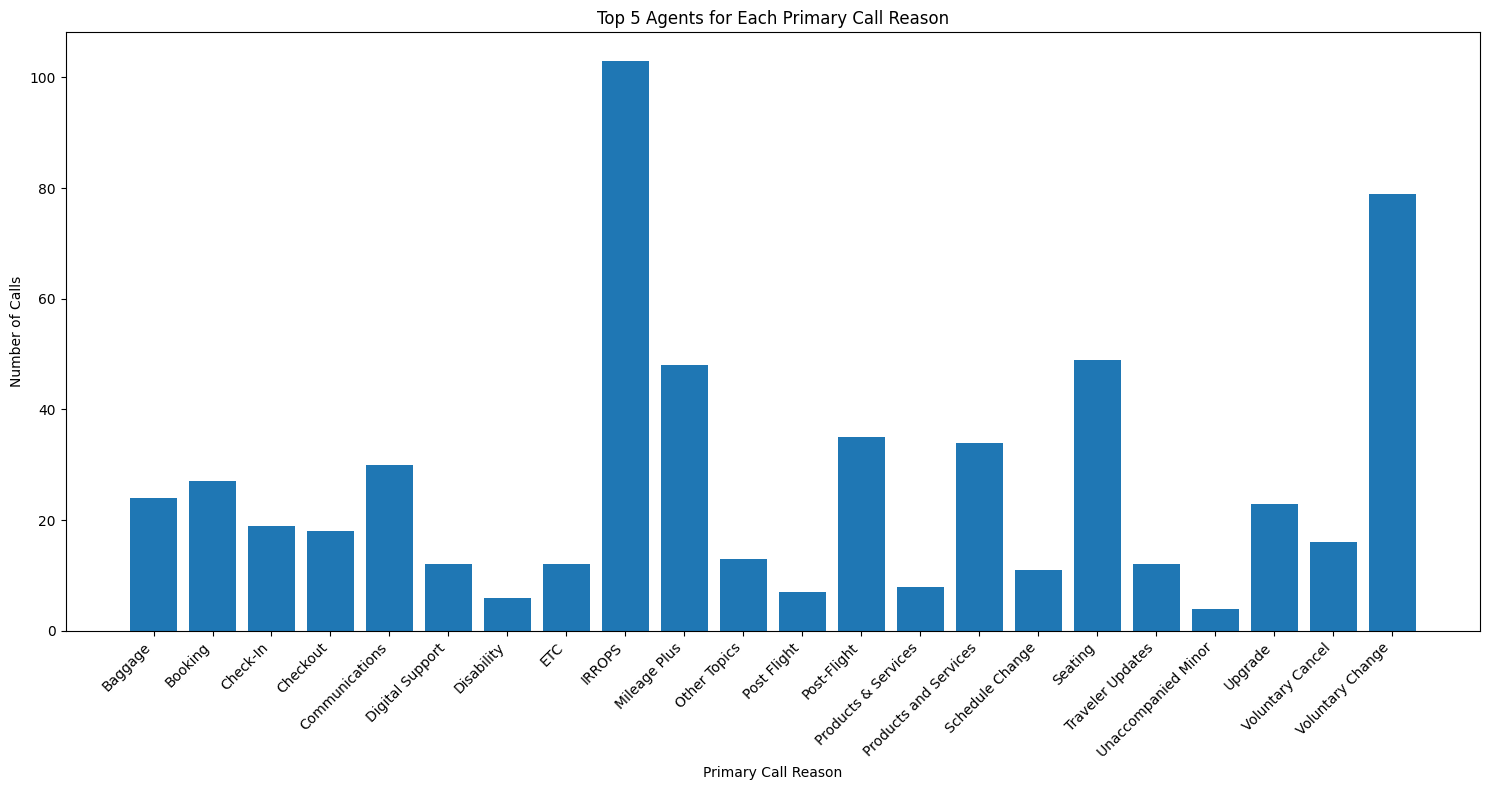

In [ ]:
# Group by 'agent_id_x' and 'primary_call_reason' and count the number of calls
agent_reason_counts = full_df.groupby(['agent_id_x', 'primary_call_reason'])['call_id'].count().reset_index()

agent_reason_counts = agent_reason_counts.rename(columns={'call_id': 'call_count'})

max_calls_by_reason = agent_reason_counts.loc[agent_reason_counts.groupby('primary_call_reason')['call_count'].idxmax()]

print("Agent who handles each primary call reason the most:")
print(max_calls_by_reason)


# Calculate the total number of calls handled by each agent
agent_total_calls = agent_reason_counts.groupby('agent_id_x')['call_count'].sum()

# Calculate the percentage of calls for each reason handled by each agent
agent_reason_counts['percentage'] = (agent_reason_counts['call_count'] / agent_reason_counts.groupby('agent_id_x')['call_count'].transform('sum')) * 100

specialist_agents = agent_reason_counts[agent_reason_counts['percentage'] > 50]
print("\nAgents who specialize in certain reasons (handle more than 50% of calls for a specific reason):")
print(specialist_agents)

agent_reason_variety = agent_reason_counts.groupby('agent_id_x')['primary_call_reason'].nunique()
agents_with_variety = agent_reason_variety[agent_reason_variety >= 5]  # Adjust the threshold as needed
print("\nAgents who handle a wide variety of reasons (at least 5 different reasons):")
print(agents_with_variety)


import matplotlib.pyplot as plt

top_agents_by_reason = agent_reason_counts.groupby('primary_call_reason').apply(lambda x: x.nlargest(5, 'call_count')).reset_index(drop=True)

plt.figure(figsize=(15, 8))
plt.bar(top_agents_by_reason['primary_call_reason'], top_agents_by_reason['call_count'])
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.title('Top 5 Agents for Each Primary Call Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
agent_reason_counts = full_df.groupby(['agent_id_x', 'primary_call_reason'])['call_id'].count().reset_index()

# Rename the 'call_id' column to 'call_count'
agent_reason_counts = agent_reason_counts.rename(columns={'call_id': 'call_count'})

# Find the agent who handles each primary call reason the most
most_frequent_agent_per_reason = agent_reason_counts.loc[agent_reason_counts.groupby('primary_call_reason')['call_count'].idxmax()]

print("Agent who handles each primary call reason the most:")
print(most_frequent_agent_per_reason)

agent_reason_percentage = agent_reason_counts.copy()
total_calls_per_agent = agent_reason_counts.groupby('agent_id_x')['call_count'].sum()
agent_reason_percentage['percentage'] = (agent_reason_percentage['call_count'] / agent_reason_percentage['agent_id_x'].map(total_calls_per_agent)) * 100

specialized_agents = agent_reason_percentage[agent_reason_percentage['percentage'] > 50]  # Adjust the threshold as needed
print("\nAgents who specialize in certain reasons (handle >50% of calls for a specific reason):")
print(specialized_agents)


agent_unique_reasons = agent_reason_counts.groupby('agent_id_x')['primary_call_reason'].nunique().reset_index()
agent_unique_reasons_sorted = agent_unique_reasons.sort_values('primary_call_reason', ascending=False)

print("\nAgents who handle a wide variety of reasons (sorted by number of unique reasons):")
print(agent_unique_reasons_sorted)


Agent who handles each primary call reason the most:
      agent_id_x    primary_call_reason  call_count
1925      390819                Baggage          24
273       149315                Booking          27
4162      715813               Check-In          19
5866      922729               Checkout          18
5593      882260         Communications          30
1187      289402        Digital Support          12
863       233571             Disability           6
2933      537208                    ETC          12
959       251287                 IRROPS         103
960       251287           Mileage Plus          48
4997      805825           Other Topics          13
6183      963118            Post Flight           7
6184      963118            Post-Flight          35
4598      757349    Products & Services           8
3290      594957  Products and Services          34
3291      594957        Schedule Change          11
4810      788537                Seating          49
329       1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Group by 'agent_id_x' and 'primary_call_reason' and count the number of calls
agent_reason_counts = full_df.groupby(['agent_id_x', 'primary_call_reason'])['call_id'].count().reset_index()

# Rename the 'call_id' column to 'call_count'
agent_reason_counts = agent_reason_counts.rename(columns={'call_id': 'call_count'})

# Create a heatmap using Plotly
fig = px.density_heatmap(agent_reason_counts, x='agent_id_x', y='primary_call_reason', z='call_count',
                         color_continuous_scale='Viridis',
                         title='Number of Calls Handled by Each Agent for Each Reason')
fig.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig.show()

# Create a bar chart using Plotly
fig_bar = px.bar(agent_reason_counts, x='agent_id_x', y='call_count', color='primary_call_reason',
                 title='Number of Calls Handled by Each Agent for Each Reason')
fig_bar.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig_bar.show()

# Save the agent_reason_counts DataFrame to a CSV file
agent_reason_counts.to_csv('agent_reason_counts.csv', index=False)


# Calculate the number of reasons handled by each agent
agent_reason_variety = agent_reason_counts.groupby('agent_id_x')['primary_call_reason'].nunique().reset_index()
agent_reason_variety = agent_reason_variety.rename(columns={'primary_call_reason': 'number_of_reasons_handled'})

print("Number of reasons handled by each agent_id_x:")
print(agent_reason_variety)

# Save the agent_reason_variety DataFrame to a CSV file
agent_reason_variety.to_csv('agent_reason_variety.csv', index=False)


Number of reasons handled by each agent_id_x:
     agent_id_x  number_of_reasons_handled
0        102574                          2
1        103651                         21
2        106000                         16
3        107876                          5
4        112609                          6
..          ...                        ...
378      981776                         21
379      981779                         22
380      982131                         19
381      992521                         16
382      993862                         20

[383 rows x 2 columns]


In [ ]:
# Group by 'agent_id_x' and 'primary_call_reason' and count the number of calls
agent_reason_counts = full_df.groupby(['agent_id_x', 'primary_call_reason'])['call_id'].count().reset_index()

agent_reason_counts = agent_reason_counts.rename(columns={'call_id': 'call_count'})

total_calls_per_agent = agent_reason_counts.groupby('agent_id_x')['call_count'].sum()

agent_reason_counts['percentage'] = (agent_reason_counts['call_count'] / agent_reason_counts['agent_id_x'].map(total_calls_per_agent)) * 100

print(agent_reason_counts)


      agent_id_x primary_call_reason  call_count  percentage
0         102574              IRROPS           1   50.000000
1         102574         Post Flight           1   50.000000
2         103651             Baggage           6    2.120141
3         103651             Booking           8    2.826855
4         103651            Check-In           8    2.826855
...          ...                 ...         ...         ...
6430      993862             Seating          34   12.318841
6431      993862    Traveler Updates           5    1.811594
6432      993862             Upgrade          10    3.623188
6433      993862    Voluntary Cancel           3    1.086957
6434      993862    Voluntary Change          57   20.652174

[6435 rows x 4 columns]


In [ ]:
# Filter the DataFrame to find agents who handle more than a certain percentage of calls for a specific reason
specialized_agents = agent_reason_counts[agent_reason_counts['percentage'] > 50]

print("Agents who specialize in certain reasons (handle more than 50% of calls for a specific reason):")
print(specialized_agents)


Agents who specialize in certain reasons (handle more than 50% of calls for a specific reason):
      agent_id_x primary_call_reason  call_count  percentage
251       140146        Mileage Plus           2   66.666667
375       161354             Baggage           1  100.000000
2058      413148         Post Flight           2   66.666667
2669      506130    Voluntary Cancel           1  100.000000
2821      524948              IRROPS           3   60.000000
3048      547592     Digital Support           1  100.000000
4703      771538    Voluntary Change           2  100.000000
5277      846440    Voluntary Change           3   75.000000
6276      974978              IRROPS           3  100.000000


In [ ]:
# Group by agent_id_x and calculate the average sentiment and handle time
agent_performance = full_df.groupby('agent_id_x').agg({'average_sentiment': 'mean', 'handle_time': 'mean'})
print(agent_performance)

# Find agents with high average sentiment and low average handle time
effective_agents = agent_performance[(agent_performance['average_sentiment'] > 0) & (agent_performance['handle_time'] > overall_avg_handle_time)]

print("Agents with positive average sentiment and high average handle time:")
print(effective_agents)

            average_sentiment  handle_time
agent_id_x                                
102574              -0.075000  3600.000000
103651              -0.027953   747.382550
106000              -0.032124   689.203540
107876              -0.065000   990.000000
112609              -0.020909   850.909091
...                       ...          ...
981776              -0.026861   703.106796
981779              -0.034714   683.788546
982131              -0.038815   722.222222
992521              -0.016957   949.565217
993862              -0.035488   675.906040

[383 rows x 2 columns]
Agents with positive average sentiment and high average handle time:
            average_sentiment  handle_time
agent_id_x                                
163203               0.006250   775.500000
187770               0.001591   570.000000
201204               0.017143  1225.714286
239874               0.070000   680.000000
240399               0.005833   635.000000
255256               0.036667  2620.000000
2939

In [ ]:
# Examining the primary call reasons handled by effective agents
effective_agent_reasons = full_df[full_df['agent_id_x'].isin(effective_agents.index)].groupby(['agent_id_x', 'primary_call_reason'])['call_id'].count().reset_index()
print("\nPrimary call reasons handled by effective agents:")
print(effective_agent_reasons)

# Comparing their performance with other agents
all_agent_performance = full_df.groupby('agent_id_x').agg({'average_sentiment': 'mean', 'handle_time': 'mean', 'call_id': 'count'})
print("\nOverall agent performance:")
print(all_agent_performance)




Primary call reasons handled by effective agents:
     agent_id_x    primary_call_reason  call_id
0        163203                Baggage        1
1        163203                Booking        1
2        163203               Checkout        2
3        163203         Communications        1
4        163203                    ETC        2
..          ...                    ...      ...
157      958516                 IRROPS        2
158      958516            Post-Flight        1
159      958516  Products and Services        1
160      980156  Products and Services        1
161      980156                Upgrade        1

[162 rows x 3 columns]

Overall agent performance:
            average_sentiment  handle_time  call_id
agent_id_x                                         
102574              -0.075000  3600.000000        2
103651              -0.027953   747.382550      298
106000              -0.032124   689.203540      113
107876              -0.065000   990.000000        6
112609   

In [ ]:

try:
  agent_details = pd.DataFrame({'agent_id_x': [101, 102, 103, 104], 'tenure': [2, 5, 1, 3], 'training_level': [1, 2, 1, 3]})
  combined_df = pd.merge(agent_performance, agent_details, on='agent_id_x', how='left')
  correlation_matrix = combined_df[['average_sentiment', 'handle_time', 'tenure', 'training_level']].corr()
  print("\nCorrelation matrix between agent characteristics and performance:")
  print(correlation_matrix)
except NameError:
  print("Agent details DataFrame not found. Please provide agent details for correlation analysis.")



Correlation matrix between agent characteristics and performance:
                   average_sentiment  handle_time  tenure  training_level
average_sentiment           1.000000     0.014546     NaN             NaN
handle_time                 0.014546     1.000000     NaN             NaN
tenure                           NaN          NaN     NaN             NaN
training_level                   NaN          NaN     NaN             NaN


In [ ]:
# Calculate the average handle time for each category of primary call reason
avg_handle_time_by_reason = full_df.groupby('primary_call_reason')['handle_time'].mean()

# Calculate the overall average handling time
overall_avg_handle_time = full_df['handle_time'].mean()

print("Average Handle Time by Primary Call Reason:")
print(avg_handle_time_by_reason)
print("\nOverall Average Handle Time:", overall_avg_handle_time)

#
print("")
average_real_handle_time_by_reason = full_df.groupby('primary_call_reason')['real_handle_time'].mean()
overall_real_avg_handle_time = full_df['real_handle_time'].mean()

print("Real Average Handle Time by Primary Call Reason:")
print(average_real_handle_time_by_reason)
print("\nOverall Real Average Handle Time:", overall_real_avg_handle_time)

print("")
average_silence_time_by_reason = full_df.groupby('primary_call_reason')['silence_time'].mean()
overall_silence_time = full_df['silence_time'].mean()

print("Silence Time by Primary Call Reason:")
print(average_silence_time_by_reason)
print("\nOverall Silence Time:", overall_silence_time)




Average Handle Time by Primary Call Reason:
primary_call_reason
Baggage                   333.644068
Booking                   427.736064
Check-In                  574.128151
Checkout                 1016.853814
Communications            826.718750
Digital Support           372.293878
Disability                292.109181
ETC                       962.899160
IRROPS                    785.116069
Mileage Plus              995.573406
Other Topics              350.097800
Post-Flight               932.896074
Products and Services     746.560624
Schedule Change           490.013680
Seating                   474.994501
Traveler Updates          393.233725
Unaccompanied Minor       519.230769
Upgrade                   632.344777
Voluntary Cancel          721.866833
Voluntary Change          639.153761
Name: handle_time, dtype: float64

Overall Average Handle Time: 697.0486004734717

Real Average Handle Time by Primary Call Reason:
primary_call_reason
Baggage                  208.195127
Booking 

In [ ]:
# Group by 'elite_level_code' and calculate the average handle time for each group
avg_handle_time_by_elite_level = full_df.groupby('elite_level_code')['handle_time'].mean()

# Create a DataFrame to store the relationship
relation_df = pd.DataFrame({'Average Handle Time': avg_handle_time_by_elite_level})

# Print the relation between elite level code and average handle time
print(relation_df)


                  Average Handle Time
elite_level_code                     
0.0                        695.999166
1.0                        688.371608
2.0                        726.449925
3.0                        727.510460
4.0                        788.244706
5.0                        896.950608


In [ ]:
elite_reason_counts = full_df.groupby(['elite_level_code', 'primary_call_reason'])['call_id'].count().reset_index()

# Rename the 'call_id' column to 'call_count'
elite_reason_counts = elite_reason_counts.rename(columns={'call_id': 'call_count'})

# Print the results
print(elite_reason_counts)


# Create a heatmap using Plotly
fig = px.density_heatmap(elite_reason_counts, x='elite_level_code', y='primary_call_reason', z='call_count',
                         color_continuous_scale='Viridis',
                         title='Number of Calls by Elite Level and Primary Call Reason')
fig.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig.show()


     elite_level_code  primary_call_reason  call_count
0                 0.0              Baggage         583
1                 0.0              Booking         525
2                 0.0             Check-In         376
3                 0.0             Checkout         395
4                 0.0       Communications         747
..                ...                  ...         ...
111               5.0              Seating          55
112               5.0     Traveler Updates          12
113               5.0  Unaccompanied Minor           5
114               5.0     Voluntary Cancel          20
115               5.0     Voluntary Change         117

[116 rows x 3 columns]


In [ ]:
fig_bar = px.bar(elite_reason_counts, x='elite_level_code', y='call_count', color='primary_call_reason',
                 title='Number of Calls by Elite Level and Primary Call Reason',
                 text='primary_call_reason') # Add the text for the call_count value
fig_bar.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig_bar.show()


In [ ]:
# Group by 'elite_level_code' and 'primary_call_reason' and count the number of calls
elite_reason_counts = full_df.groupby(['elite_level_code', 'primary_call_reason'])['call_id'].count().reset_index()

# Rename the 'call_id' column to 'call_count'
elite_reason_counts = elite_reason_counts.rename(columns={'call_id': 'call_count'})

# Calculate the total number of calls for each elite level
total_calls_per_elite = elite_reason_counts.groupby('elite_level_code')['call_count'].sum()

# Calculate the percentage of calls for each reason within each elite level
elite_reason_counts['percentage'] = (elite_reason_counts['call_count'] / elite_reason_counts['elite_level_code'].map(total_calls_per_elite)) * 100

# Print the results
print(elite_reason_counts)


     elite_level_code  primary_call_reason  call_count  percentage
0                 0.0              Baggage         583    4.370970
1                 0.0              Booking         525    3.936122
2                 0.0             Check-In         376    2.819013
3                 0.0             Checkout         395    2.961463
4                 0.0       Communications         747    5.600540
..                ...                  ...         ...         ...
111               5.0              Seating          55    4.214559
112               5.0     Traveler Updates          12    0.919540
113               5.0  Unaccompanied Minor           5    0.383142
114               5.0     Voluntary Cancel          20    1.532567
115               5.0     Voluntary Change         117    8.965517

[116 rows x 4 columns]


In [ ]:
import plotly.express as px

# Create a stacked bar chart using Plotly
fig_stacked_bar = px.bar(elite_reason_counts, x='elite_level_code', y='call_count', color='primary_call_reason',
                         title='Distribution of Call Reasons Across Elite Levels',
                         text='primary_call_reason')  # Add the text for the call_count value
fig_stacked_bar.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig_stacked_bar.show()


In [ ]:
# Group by 'elite_level_code', 'primary_call_reason', and calculate the average sentiment and handle time
elite_reason_performance = full_df.groupby(['elite_level_code', 'primary_call_reason']).agg({'average_sentiment': 'mean', 'handle_time': 'mean'}).reset_index()

print("Average sentiment and handle time for each combination of elite level and call reason:")
print(elite_reason_performance)


Average sentiment and handle time for each combination of elite level and call reason:
     elite_level_code  primary_call_reason  average_sentiment  handle_time
0                 0.0              Baggage          -0.022934   338.078902
1                 0.0              Booking          -0.020344   452.800000
2                 0.0             Check-In          -0.043590   600.797872
3                 0.0             Checkout          -0.072589  1025.164557
4                 0.0       Communications          -0.033454   867.550201
..                ...                  ...                ...          ...
111               5.0              Seating          -0.012778   485.454545
112               5.0     Traveler Updates           0.059167   455.000000
113               5.0  Unaccompanied Minor          -0.114000   264.000000
114               5.0     Voluntary Cancel          -0.050000   477.000000
115               5.0     Voluntary Change          -0.005470   565.641026

[116 rows x 

In [ ]:
# Create a heatmap using Plotly to visualize the average sentiment for each elite level and call reason combination
fig_heatmap_sentiment = px.density_heatmap(elite_reason_performance, x='elite_level_code', y='primary_call_reason', z='average_sentiment',
                                         color_continuous_scale='RdBu',
                                         title='Average Sentiment by Elite Level and Call Reason')
fig_heatmap_sentiment.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig_heatmap_sentiment.show()


# Create a line chart using Plotly to visualize the average handle time for each elite level and call reason combination
fig_line_handle_time = px.line(elite_reason_performance, x='elite_level_code', y='handle_time', color='primary_call_reason',
                               title='Average Handle Time by Elite Level and Call Reason')
fig_line_handle_time.update_layout(xaxis_tickfont_size=10, yaxis_tickfont_size=10)
fig_line_handle_time.show()


In [ ]:
# Identify combinations with low average sentiment or high average handle time
challenging_combinations = elite_reason_performance[(elite_reason_performance['average_sentiment'] < 0) | (elite_reason_performance['handle_time'] > overall_avg_handle_time)]
print("Combinations with low average sentiment or high average handle time:")
print(challenging_combinations)

# Compare performance across different elite levels for the same call reason
for reason in elite_reason_performance['primary_call_reason'].unique():
  reason_performance = elite_reason_performance[elite_reason_performance['primary_call_reason'] == reason]
  print(f"\nPerformance for call reason: {reason}")
  print(reason_performance)


Combinations with low average sentiment or high average handle time:
     elite_level_code  primary_call_reason  average_sentiment  handle_time
0                 0.0              Baggage          -0.022934   338.078902
1                 0.0              Booking          -0.020344   452.800000
2                 0.0             Check-In          -0.043590   600.797872
3                 0.0             Checkout          -0.072589  1025.164557
4                 0.0       Communications          -0.033454   867.550201
..                ...                  ...                ...          ...
110               5.0      Schedule Change          -0.058889   426.666667
111               5.0              Seating          -0.012778   485.454545
113               5.0  Unaccompanied Minor          -0.114000   264.000000
114               5.0     Voluntary Cancel          -0.050000   477.000000
115               5.0     Voluntary Change          -0.005470   565.641026

[100 rows x 4 columns]

Perfor

In [ ]:
elite_reason_performance = full_df.groupby(['elite_level_code', 'primary_call_reason']).agg({'average_sentiment': 'mean', 'handle_time': 'mean'}).reset_index()

# Create an empty DataFrame to store the differences
difference_df = pd.DataFrame(columns=['primary_call_reason', 'elite_level_code_1', 'elite_level_code_2', 'sentiment_difference', 'handle_time_difference'])

# Iterate through unique call reasons
for reason in elite_reason_performance['primary_call_reason'].unique():
  reason_performance = elite_reason_performance[elite_reason_performance['primary_call_reason'] == reason]

  # Iterate through combinations of elite levels
  for i in range(len(reason_performance)):
    for j in range(i + 1, len(reason_performance)):
      elite_level_1 = reason_performance.iloc[i]['elite_level_code']
      elite_level_2 = reason_performance.iloc[j]['elite_level_code']
      sentiment_difference = reason_performance.iloc[i]['average_sentiment'] - reason_performance.iloc[j]['average_sentiment']
      handle_time_difference = reason_performance.iloc[i]['handle_time'] - reason_performance.iloc[j]['handle_time']

      # Add the differences to the DataFrame
      new_row = pd.DataFrame({'primary_call_reason': [reason],
                              'elite_level_code_1': [elite_level_1],
                              'elite_level_code_2': [elite_level_2],
                              'sentiment_difference': [sentiment_difference],
                              'handle_time_difference': [handle_time_difference]})
      difference_df = pd.concat([difference_df, new_row], ignore_index=True)

# Print the table of differences
print("Difference in average sentiment and handle time between elite levels for each call reason:")
print(difference_df)


<ipython-input-184-e118099ffa4f>:27: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Difference in average sentiment and handle time between elite levels for each call reason:
    primary_call_reason  elite_level_code_1  elite_level_code_2  \
0               Baggage                 0.0                 1.0   
1               Baggage                 0.0                 2.0   
2               Baggage                 0.0                 3.0   
3               Baggage                 1.0                 2.0   
4               Baggage                 1.0                 3.0   
..                  ...                 ...                 ...   
277    Voluntary Change                 2.0                 4.0   
278    Voluntary Change                 2.0                 5.0   
279    Voluntary Change                 3.0                 4.0   
280    Voluntary Change                 3.0                 5.0   
281    Voluntary Change                 4.0                 5.0   

     sentiment_difference  handle_time_difference  
0               -0.004561               19.216343  


In [ ]:
# Extract top call reasons that might be resolved via self-service options
potential_self_service_options = call_reason_aht_ast[
    call_reason_aht_ast['primary_call_reason'].isin(['Booking', 'Seating', 'Voluntary  Cancel', 'Upgrade', 'General Inquiry'])
]


In [ ]:
# df--> call_id, agent_tone, customer_tone, handle_time-->> train-test-split, y--> call_reasons, classifier_model--> random_forest-- hyperparameter_tuning--> division less

In [18]:
test_df = pd.read_csv('/content/drive/MyDrive/ua/testbc7185d.csv')

# Perform a left join on 'call_id'
test_df = pd.merge(test_df, full_df, on='call_id', how='left')


<ipython-input-18-f464f7e13298>:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  test_df = pd.merge(test_df, full_df, on='call_id', how='left')


In [19]:
test_df.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'handle_time', 'speed_to_answer', 'primary_call_reason', 'agent_id_y',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'customer_name', 'elite_level_code'],
      dtype='object')

In [20]:
columns_to_drop = ['call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript','agent_id_y', 'customer_name']
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')


In [21]:
test_df


,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code
0,7732610078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2400299738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6533095063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7774450920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9214147168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5152,5300201106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5153,727694488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5154,147487837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5155,5330794838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
nan_counts = test_df.isnull().sum()
print(nan_counts)


call_id                       0
customer_id                5157
agent_id_x                 5157
handle_time                5157
speed_to_answer            5157
primary_call_reason        5157
agent_tone                 5157
customer_tone              5157
average_sentiment          5157
silence_percent_average    5157
elite_level_code           5157
dtype: int64


In [23]:
from sklearn.preprocessing import OrdinalEncoder
# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'agent_tone' and 'customer_tone' columns
test_df[['agent_tone_encoded', 'customer_tone_encoded']] = ordinal_encoder.fit_transform(test_df[['agent_tone', 'customer_tone']])


In [24]:
test_df

,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code,agent_tone_encoded,customer_tone_encoded
0,7732610078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2400299738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6533095063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7774450920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9214147168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,5300201106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5153,727694488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5154,147487837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5155,5330794838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
test_df = test_df.drop(columns = ['agent_tone', 'customer_tone'] , axis=1, errors='ignore')


In [26]:
test_df

,call_id,customer_id,agent_id_x,handle_time,speed_to_answer,primary_call_reason,average_sentiment,silence_percent_average,elite_level_code,agent_tone_encoded,customer_tone_encoded
0,7732610078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2400299738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6533095063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7774450920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9214147168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5152,5300201106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5153,727694488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5154,147487837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5155,5330794838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test_df['agent_tone_encoded'].fillna(test_df['agent_tone_encoded'].median(), inplace=True)


<ipython-input-27-ffdec31b4835>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['agent_tone_encoded'].fillna(test_df['agent_tone_encoded'].median(), inplace=True)


In [8]:
train_df = full_df

In [9]:
train_df.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'handle_time', 'speed_to_answer', 'primary_call_reason', 'agent_id_y',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'customer_name', 'elite_level_code'],
      dtype='object')

In [10]:
columns_to_drop = ['call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript','agent_id_y', 'customer_name']

train_df = train_df.drop(columns=columns_to_drop, errors='ignore')



In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'agent_tone' and 'customer_tone' columns
train_df[['agent_tone_encoded', 'customer_tone_encoded']] = ordinal_encoder.fit_transform(train_df[['agent_tone', 'customer_tone']])

train_df = train_df.drop(columns=['agent_tone', 'customer_tone'], axis=1, errors='ignore')


In [12]:
train_df = train_df.drop(columns = ['agent_tone', 'customer_tone'] , axis=1, errors='ignore')

In [13]:
train_df.columns


Index(['call_id', 'customer_id', 'agent_id_x', 'handle_time',
       'speed_to_answer', 'primary_call_reason', 'average_sentiment',
       'silence_percent_average', 'elite_level_code', 'agent_tone_encoded',
       'customer_tone_encoded'],
      dtype='object')

In [14]:
train_df['agent_tone_encoded'].fillna(train_df['agent_tone_encoded'].median(), inplace=True)


<ipython-input-14-67f1fc68c815>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['agent_tone_encoded'].fillna(train_df['agent_tone_encoded'].median(), inplace=True)


In [15]:
train_df.dropna(subset=['primary_call_reason'], inplace=True)


In [16]:
X_train = train_df.drop('primary_call_reason', axis=1)
y_train = train_df['primary_call_reason']

# Check for NaN values in X_train
nan_counts = X_train.isnull().sum()
print("NaN counts in X_train:\n", nan_counts)


NaN counts in X_train:
 call_id                    0
customer_id                0
agent_id_x                 0
handle_time                0
speed_to_answer            0
average_sentiment          0
silence_percent_average    0
elite_level_code           0
agent_tone_encoded         0
customer_tone_encoded      0
dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
X_test = test_df.drop('primary_call_reason', axis=1)
y_test = test_df['primary_call_reason']

In [29]:
y_test

,primary_call_reason
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5152,NaN
5153,NaN
5154,NaN
5155,NaN


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train_df.drop('primary_call_reason', axis=1)
y = train_df['primary_call_reason']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3850270054010802


In [36]:
import pandas as pd

# Ensure y_pred and y_test have the same length
y_pred_subset = y_pred[:len(y_test)]

# Create a DataFrame with the actual and predicted values
y_test_with_predictions = pd.DataFrame({
    'actual_primary_call_reason': y_test,
    'predicted_primary_call_reason': y_pred_subset
})

predicted_df = pd.DataFrame({'call_id': test_df['call_id'], 'predicted_primary_call_reason': y_pred_subset})

# Save the predictions to a CSV file
predicted_df.to_csv('predicted_primary_call_reasons.csv', index=False)


print(y_test_with_predictions)

     actual_primary_call_reason predicted_primary_call_reason
0                           NaN                        IRROPS
1                           NaN                        IRROPS
2                           NaN                        IRROPS
3                           NaN                        IRROPS
4                           NaN                        IRROPS
...                         ...                           ...
5152                        NaN                        IRROPS
5153                        NaN                        IRROPS
5154                        NaN                        IRROPS
5155                        NaN                        IRROPS
5156                        NaN                        IRROPS

[5157 rows x 2 columns]
